In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import random

In [2]:
TRAIN_DIR = os.path.join('C:\CVPR\CIFAR-10-images-master', 'train')

In [3]:
CATEGORIES = []

for i in os.listdir(TRAIN_DIR):
    CATEGORIES.append(i)

print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append({'image': img_arr, 'class': class_num})
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:01<00:00, 4376.31it/s]

50000


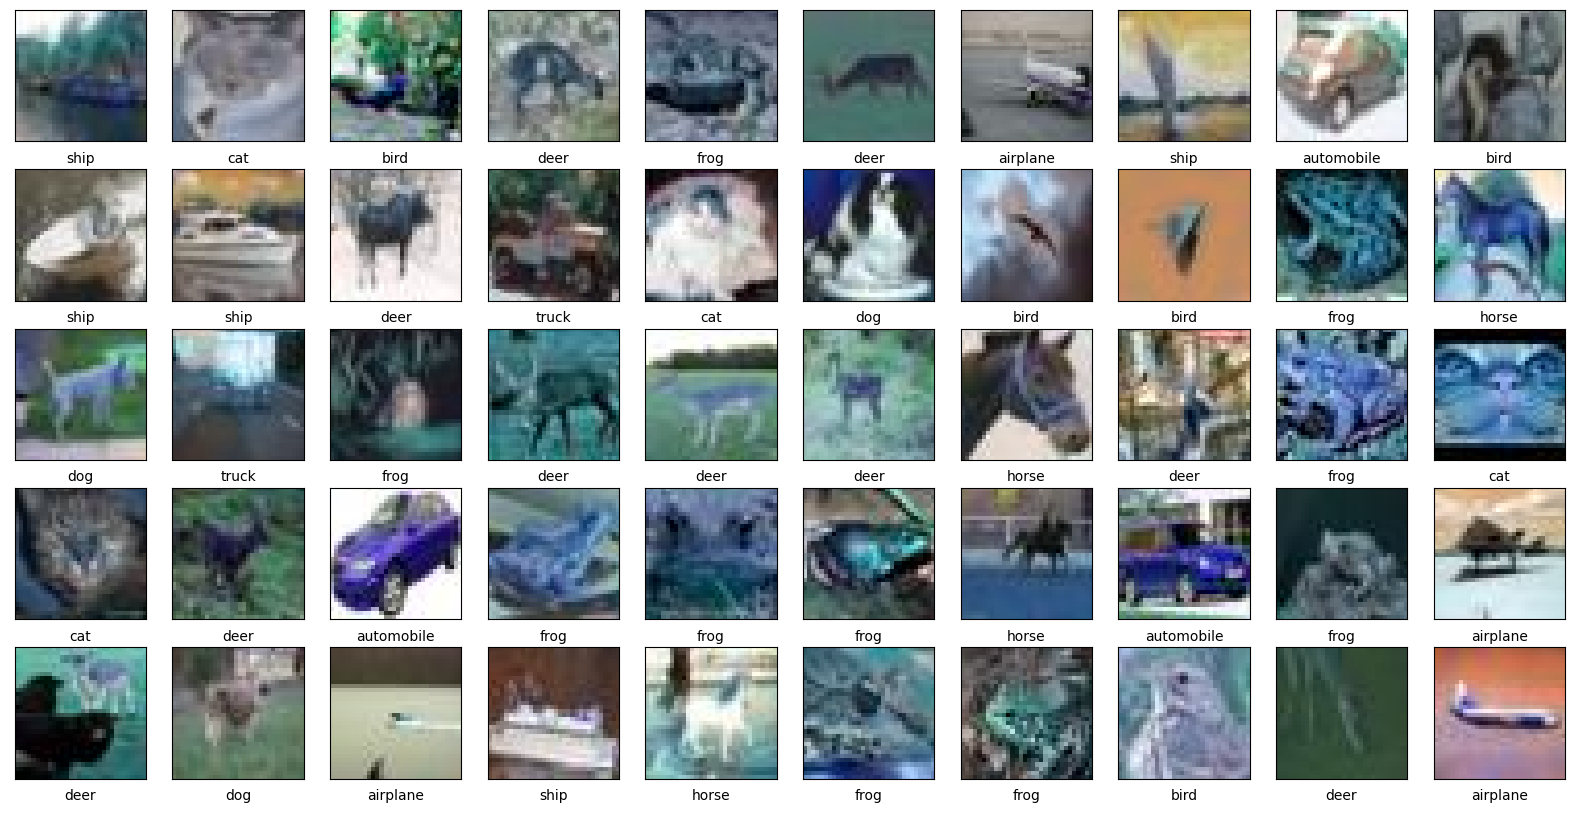

In [5]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i]['image'])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i]['class']])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()


In [6]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [7]:
class KNN:
    k = None

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def accuracy(self, y_actual, y_pred):
        return np.sum(y_actual == y_pred) / len(y_actual)
    
    def predict(self, X_test, l_func = "l2"):
        y_predtion = [] 
        i = 0
        for x in tqdm(X_test):
            distances = []
            for i in range(len(self.X)):
                if l_func == "l2":
                    distance = np.sqrt(np.sum((x - self.X[i])**2))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
                elif l_func == "l1":
                    distance = np.sum(np.abs(x - self.X[i]))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
            distances.sort(key=lambda x: x['distance'])
            k_nearest = distances[:self.k]
            k_nearest_classes = [x['class'] for x in k_nearest]
            y_predtion.append(max(set(k_nearest_classes), key=k_nearest_classes.count))
        return y_predtion

In [10]:
def split(X, y, test_size=0.2):
    X_train = X[:int(len(X)*(1-test_size))]
    X_test = X[int(len(X)*(1-test_size)):]
    y_train = y[:int(len(y)*(1-test_size))]
    y_test = y[int(len(y)*(1-test_size)):]
    return X_train, X_test, y_train, y_test

X = np.array([i['image'] for i in TRAIN_DATA[:5000]])
y = np.array([i['class'] for i in TRAIN_DATA[:5000]])

l1_acc = {}
l2_acc = {}

k_neighbors = np.arange(1, 20)

for k in tqdm(k_neighbors):
    knn = KNN(k)
    
    X_train , X_test, y_train, y_test = split(X, y, test_size=0.2)

    knn.fit(X_train, y_train)

    y_pred_l1 = knn.predict(X_test, l_func="l1")
    y_pred_l2 = knn.predict(X_test, l_func="l2")

   
    l1_acc[k] = knn.accuracy(y_test, y_pred_l1)
    l2_acc[k] = knn.accuracy(y_test, y_pred_l2)

    print(f"When k = {k} accuracy of l1 is {l1_acc[k]} and accuracy of l2 is {l2_acc[k]}")

 27%|██▋       | 272/1000 [00:25<01:25,  8.49it/s]


 54%|█████▍    | 538/1000 [00:50<00:37, 12.28it/s]


 79%|███████▉  | 793/1000 [01:14<00:20, 10.10it/s]


100%|██████████| 1000/1000 [01:31<00:00, 10.89it/s][A

  7%|▋         | 70/1000 [00:07<01:41,  9.19it/s]


 29%|██▊       | 286/1000 [00:31<02:15,  5.25it/s]


 52%|█████▏    | 516/1000 [00:56<00:50,  9.65it/s]


 72%|███████▏  | 722/1000 [01:17<00:33,  8.40it/s]


 93%|█████████▎| 929/1000 [01:40<00:09,  7.79it/s]


  5%|▌         | 1/19 [03:19<59:51, 199.53s/it]

When k = 1 accuracy of l1 is 0.207 and accuracy of l2 is 0.188



 30%|███       | 302/1000 [00:24<00:55, 12.66it/s]


 60%|██████    | 601/1000 [00:49<00:47,  8.41it/s]


 88%|████████▊ | 880/1000 [01:14<00:09, 12.50it/s]


100%|██████████| 1000/1000 [01:23<00:00, 11.91it/s]

 13%|█▎        | 129/1000 [00:13<01:54,  7.63it/s]


 29%|██▉       | 289/1000 [00:33<02:05,  5.67it/s]


 45%|████▍     | 448/1000 [00:52<01:11,  7.68it/s]


 61%|██████▏   | 614/1000 [01:11<00:46,  8.37it/s]


 78%|███████▊  | 784/1000 [01:33<00:25,  8.38it/s]


100%|█████████▉| 995/1000 [01:56<00:00,  9.14it/s]


 11%|█         | 2/19 [06:41<56:51, 200.67s/it]

When k = 2 accuracy of l1 is 0.202 and accuracy of l2 is 0.189



 30%|██▉       | 296/1000 [00:24<01:30,  7.80it/s]


 55%|█████▌    | 553/1000 [00:49<00:36, 12.36it/s]


 83%|████████▎ | 826/1000 [01:15<00:24,  7.10it/s]


100%|██████████| 1000/1000 [01:32<00:00, 10.84it/s]

  5%|▌         | 51/1000 [00:06<02:00,  7.87it/s]


 21%|██▏       | 214/1000 [00:26<01:45,  7.47it/s]


 37%|███▋      | 373/1000 [00:46<01:32,  6.79it/s]


 53%|█████▎    | 529/1000 [01:06<01:06,  7.11it/s]


 70%|██████▉   | 695/1000 [01:26<00:42,  7.25it/s]


 85%|████████▌ | 854/1000 [01:46<00:18,  8.03it/s]


 16%|█▌        | 3/19 [10:17<55:27, 208.00s/it]

When k = 3 accuracy of l1 is 0.204 and accuracy of l2 is 0.179



 26%|██▋       | 265/1000 [00:24<00:59, 12.26it/s]


 56%|█████▌    | 556/1000 [00:49<00:42, 10.52it/s]


 84%|████████▍ | 842/1000 [01:14<00:14, 10.82it/s]


100%|██████████| 1000/1000 [01:28<00:00, 11.33it/s]

  9%|▉         | 92/1000 [00:11<02:03,  7.34it/s]


 27%|██▋       | 270/1000 [00:30<01:17,  9.44it/s]


 44%|████▍     | 442/1000 [00:50<01:21,  6.88it/s]


 61%|██████    | 608/1000 [01:08<00:45,  8.66it/s]


 77%|███████▋  | 768/1000 [01:28<00:30,  7.49it/s]


 98%|█████████▊| 984/1000 [01:50<00:01,  9.17it/s]


 21%|██        | 4/19 [13:38<51:19, 205.30s/it]

When k = 4 accuracy of l1 is 0.217 and accuracy of l2 is 0.182



 28%|██▊       | 282/1000 [00:25<01:10, 10.14it/s]


 57%|█████▊    | 575/1000 [00:50<00:34, 12.20it/s]


 82%|████████▏ | 821/1000 [01:13<00:15, 11.53it/s]


100%|██████████| 1000/1000 [01:29<00:00, 11.14it/s]

  6%|▌         | 55/1000 [00:07<02:20,  6.73it/s]


 22%|██▏       | 224/1000 [00:26<01:21,  9.56it/s]


 40%|████      | 401/1000 [00:47<01:21,  7.32it/s]


 59%|█████▉    | 593/1000 [01:08<00:45,  9.01it/s]


 76%|███████▌  | 761/1000 [01:27<00:27,  8.73it/s]


 93%|█████████▎| 933/1000 [01:47<00:08,  7.79it/s]


 26%|██▋       | 5/19 [17:04<47:57, 205.51s/it]

When k = 5 accuracy of l1 is 0.227 and accuracy of l2 is 0.181



 28%|██▊       | 277/1000 [00:25<01:49,  6.59it/s]


 53%|█████▎    | 534/1000 [00:50<00:44, 10.41it/s]


 77%|███████▋  | 769/1000 [01:14<00:31,  7.45it/s]


100%|██████████| 1000/1000 [01:36<00:00, 10.36it/s]

  1%|▏         | 14/1000 [00:01<01:47,  9.20it/s]


 18%|█▊        | 182/1000 [00:20<01:29,  9.17it/s]


 35%|███▌      | 351/1000 [00:39<01:24,  7.68it/s]


 53%|█████▎    | 532/1000 [01:00<00:57,  8.14it/s]


 74%|███████▍  | 742/1000 [01:22<00:27,  9.48it/s]


 91%|█████████ | 911/1000 [01:43<00:09,  9.46it/s]


 32%|███▏      | 6/19 [20:34<44:48, 206.82s/it]

When k = 6 accuracy of l1 is 0.221 and accuracy of l2 is 0.182



 28%|██▊       | 279/1000 [00:25<01:19,  9.08it/s]


 58%|█████▊    | 581/1000 [00:50<00:33, 12.56it/s]


 85%|████████▍ | 848/1000 [01:14<00:13, 11.03it/s]


100%|██████████| 1000/1000 [01:27<00:00, 11.44it/s]

  8%|▊         | 79/1000 [00:09<01:38,  9.38it/s]


 27%|██▋       | 274/1000 [00:30<01:17,  9.38it/s]


 48%|████▊     | 475/1000 [00:53<01:07,  7.76it/s]


 63%|██████▎   | 627/1000 [01:13<00:46,  8.01it/s]


 78%|███████▊  | 784/1000 [01:32<00:33,  6.46it/s]


 96%|█████████▌| 958/1000 [01:51<00:06,  6.90it/s]


 37%|███▋      | 7/19 [23:58<41:11, 205.98s/it]

When k = 7 accuracy of l1 is 0.229 and accuracy of l2 is 0.186



 30%|███       | 302/1000 [00:25<00:58, 12.01it/s]


 59%|█████▉    | 593/1000 [00:50<00:33, 11.98it/s]


 88%|████████▊ | 878/1000 [01:16<00:14,  8.36it/s]


100%|██████████| 1000/1000 [01:26<00:00, 11.60it/s][A

 10%|▉         | 96/1000 [00:11<01:40,  8.99it/s]


 26%|██▌       | 262/1000 [00:30<01:16,  9.59it/s]


 44%|████▍     | 443/1000 [00:51<01:08,  8.15it/s]


 63%|██████▎   | 631/1000 [01:12<00:39,  9.38it/s]


 81%|████████  | 809/1000 [01:32<00:19,  9.71it/s]


 42%|████▏     | 8/19 [27:17<37:23, 203.93s/it]

When k = 8 accuracy of l1 is 0.227 and accuracy of l2 is 0.185



 28%|██▊       | 282/1000 [00:24<00:58, 12.36it/s]


 56%|█████▋    | 563/1000 [00:48<00:35, 12.17it/s]


 84%|████████▍ | 839/1000 [01:13<00:13, 12.19it/s]


100%|██████████| 1000/1000 [01:27<00:00, 11.46it/s][A

  8%|▊         | 82/1000 [00:08<01:45,  8.67it/s]


 25%|██▌       | 252/1000 [00:28<01:39,  7.49it/s]


 44%|████▎     | 436/1000 [00:49<01:10,  8.00it/s]


 64%|██████▍   | 642/1000 [01:11<00:40,  8.89it/s]


 82%|████████▏ | 819/1000 [01:33<00:28,  6.46it/s]


 99%|█████████▉| 994/1000 [01:53<00:00,  7.94it/s]


 47%|████▋     | 9/19 [30:39<33:52, 203.28s/it]

When k = 9 accuracy of l1 is 0.231 and accuracy of l2 is 0.18



 30%|███       | 302/1000 [00:24<00:57, 12.20it/s]


 57%|█████▋    | 567/1000 [00:49<00:35, 12.33it/s]


 84%|████████▍ | 839/1000 [01:14<00:17,  9.27it/s]


100%|██████████| 1000/1000 [01:28<00:00, 11.36it/s][A

  7%|▋         | 72/1000 [00:08<02:03,  7.53it/s]


 25%|██▌       | 250/1000 [00:30<01:21,  9.26it/s]


 42%|████▏     | 418/1000 [00:49<01:15,  7.71it/s]


 58%|█████▊    | 584/1000 [01:08<00:52,  7.95it/s]


 77%|███████▋  | 769/1000 [01:30<00:25,  9.00it/s]


 53%|█████▎    | 10/19 [34:01<30:25, 202.80s/it]

When k = 10 accuracy of l1 is 0.235 and accuracy of l2 is 0.185



 30%|███       | 302/1000 [00:23<00:50, 13.79it/s]


 59%|█████▊    | 587/1000 [00:48<00:38, 10.86it/s]


 89%|████████▊ | 887/1000 [01:13<00:08, 13.39it/s]


100%|██████████| 1000/1000 [01:21<00:00, 12.22it/s][A

 16%|█▌        | 158/1000 [00:15<01:35,  8.85it/s]


 40%|████      | 402/1000 [00:41<01:03,  9.43it/s]


 66%|██████▌   | 655/1000 [01:06<00:32, 10.62it/s]


 90%|████████▉ | 897/1000 [01:31<00:09, 10.50it/s]


 58%|█████▊    | 11/19 [37:05<26:16, 197.11s/it]

When k = 11 accuracy of l1 is 0.227 and accuracy of l2 is 0.187



 30%|██▉       | 299/1000 [00:23<00:57, 12.29it/s]


 60%|█████▉    | 596/1000 [00:47<00:30, 13.34it/s]


 90%|████████▉ | 896/1000 [01:12<00:11,  9.25it/s]


100%|██████████| 1000/1000 [01:21<00:00, 12.34it/s][A

 18%|█▊        | 177/1000 [00:16<01:14, 11.07it/s]


 41%|████▏     | 414/1000 [00:41<00:58,  9.97it/s]


 68%|██████▊   | 675/1000 [01:07<00:29, 11.15it/s]


 94%|█████████▍| 938/1000 [01:33<00:06, 10.15it/s]


 63%|██████▎   | 12/19 [40:05<22:23, 191.96s/it]

When k = 12 accuracy of l1 is 0.221 and accuracy of l2 is 0.186



 29%|██▉       | 289/1000 [00:25<01:05, 10.94it/s]


 59%|█████▉    | 591/1000 [00:48<00:29, 13.75it/s]


 88%|████████▊ | 879/1000 [01:13<00:09, 12.21it/s]


100%|██████████| 1000/1000 [01:22<00:00, 12.06it/s][A

 16%|█▌        | 156/1000 [00:15<01:23, 10.14it/s]


 41%|████      | 412/1000 [00:40<01:01,  9.60it/s]


 65%|██████▌   | 650/1000 [01:06<00:44,  7.89it/s]


 91%|█████████ | 911/1000 [01:31<00:08, 10.93it/s]


 68%|██████▊   | 13/19 [43:09<18:56, 189.40s/it]

When k = 13 accuracy of l1 is 0.225 and accuracy of l2 is 0.199



 30%|███       | 301/1000 [00:25<00:51, 13.65it/s]


 60%|██████    | 600/1000 [00:49<00:29, 13.51it/s]


 90%|█████████ | 901/1000 [01:13<00:08, 11.16it/s]


100%|██████████| 1000/1000 [01:22<00:00, 12.18it/s][A

 17%|█▋        | 169/1000 [00:17<01:19, 10.50it/s]


 42%|████▏     | 421/1000 [00:42<01:12,  8.02it/s]


 65%|██████▌   | 654/1000 [01:07<00:43,  7.90it/s]


 88%|████████▊ | 877/1000 [01:31<00:17,  7.00it/s]


 74%|███████▎  | 14/19 [46:14<15:40, 188.14s/it]

When k = 14 accuracy of l1 is 0.227 and accuracy of l2 is 0.192



 30%|███       | 301/1000 [00:24<00:52, 13.41it/s]


 60%|██████    | 601/1000 [00:49<00:29, 13.50it/s]


 90%|████████▉ | 899/1000 [01:12<00:07, 13.75it/s]


100%|██████████| 1000/1000 [01:20<00:00, 12.44it/s][A

 16%|█▌        | 159/1000 [00:16<01:19, 10.54it/s]


 42%|████▏     | 422/1000 [00:42<00:52, 11.00it/s]


 69%|██████▉   | 691/1000 [01:08<00:33,  9.14it/s]


 95%|█████████▌| 952/1000 [01:34<00:05,  8.51it/s]


 79%|███████▉  | 15/19 [49:15<12:23, 185.89s/it]

When k = 15 accuracy of l1 is 0.227 and accuracy of l2 is 0.196



 30%|███       | 302/1000 [00:23<00:52, 13.40it/s]


 60%|█████▉    | 597/1000 [00:48<00:38, 10.43it/s]


 90%|████████▉ | 896/1000 [01:12<00:07, 13.46it/s]


100%|██████████| 1000/1000 [01:20<00:00, 12.35it/s]

 18%|█▊        | 179/1000 [00:16<01:16, 10.67it/s]


 44%|████▍     | 442/1000 [00:42<01:06,  8.38it/s]


 68%|██████▊   | 679/1000 [01:07<00:29, 11.00it/s]


 95%|█████████▌| 951/1000 [01:33<00:05,  9.15it/s]


 84%|████████▍ | 16/19 [52:14<09:11, 183.95s/it]

When k = 16 accuracy of l1 is 0.233 and accuracy of l2 is 0.199



 30%|███       | 300/1000 [00:23<00:52, 13.30it/s]


 60%|██████    | 602/1000 [00:47<00:30, 13.26it/s]


 90%|█████████ | 904/1000 [01:11<00:07, 13.70it/s]


100%|██████████| 1000/1000 [01:19<00:00, 12.64it/s][A

 17%|█▋        | 168/1000 [00:17<01:15, 11.02it/s]


 44%|████▎     | 437/1000 [00:42<00:52, 10.81it/s]


 69%|██████▊   | 687/1000 [01:07<00:37,  8.32it/s]


 94%|█████████▍| 941/1000 [01:32<00:06,  8.67it/s]


 89%|████████▉ | 17/19 [55:12<06:04, 182.08s/it]

When k = 17 accuracy of l1 is 0.235 and accuracy of l2 is 0.208



 29%|██▊       | 286/1000 [00:25<01:13,  9.67it/s]


 50%|████▉     | 496/1000 [00:48<00:49, 10.19it/s]


 77%|███████▋  | 771/1000 [01:13<00:28,  8.13it/s]


100%|██████████| 1000/1000 [01:34<00:00, 10.62it/s]

  2%|▏         | 21/1000 [00:02<02:19,  7.01it/s]


 18%|█▊        | 178/1000 [00:21<01:37,  8.46it/s]


 34%|███▍      | 339/1000 [00:39<01:15,  8.78it/s]


 50%|█████     | 503/1000 [00:58<00:57,  8.65it/s]


 66%|██████▌   | 658/1000 [01:18<00:52,  6.49it/s]


 81%|████████▏ | 814/1000 [01:37<00:21,  8.59it/s]


 97%|█████████▋| 969/1000 [01:57<00:03,  8.20it/s]


 95%|█████████▍| 18/19 [58:47<03:11, 191.99s/it]

When k = 18 accuracy of l1 is 0.232 and accuracy of l2 is 0.208



 27%|██▋       | 268/1000 [00:25<01:10, 10.43it/s]


 54%|█████▍    | 543/1000 [00:49<00:43, 10.39it/s]


 80%|███████▉  | 799/1000 [01:13<00:16, 11.89it/s]


100%|██████████| 1000/1000 [01:31<00:00, 10.87it/s][A

  4%|▍         | 42/1000 [00:04<01:47,  8.94it/s]


 21%|██        | 206/1000 [00:23<01:53,  7.01it/s]


 37%|███▋      | 366/1000 [00:42<01:10,  9.01it/s]


 54%|█████▍    | 544/1000 [01:02<01:05,  6.99it/s]


 72%|███████▏  | 719/1000 [01:22<00:30,  9.26it/s]


 88%|████████▊ | 885/1000 [01:41<00:12,  8.91it/s]


100%|██████████| 19/19 [1:02:15<00:00, 196.60s/it]

When k = 19 accuracy of l1 is 0.228 and accuracy of l2 is 0.206


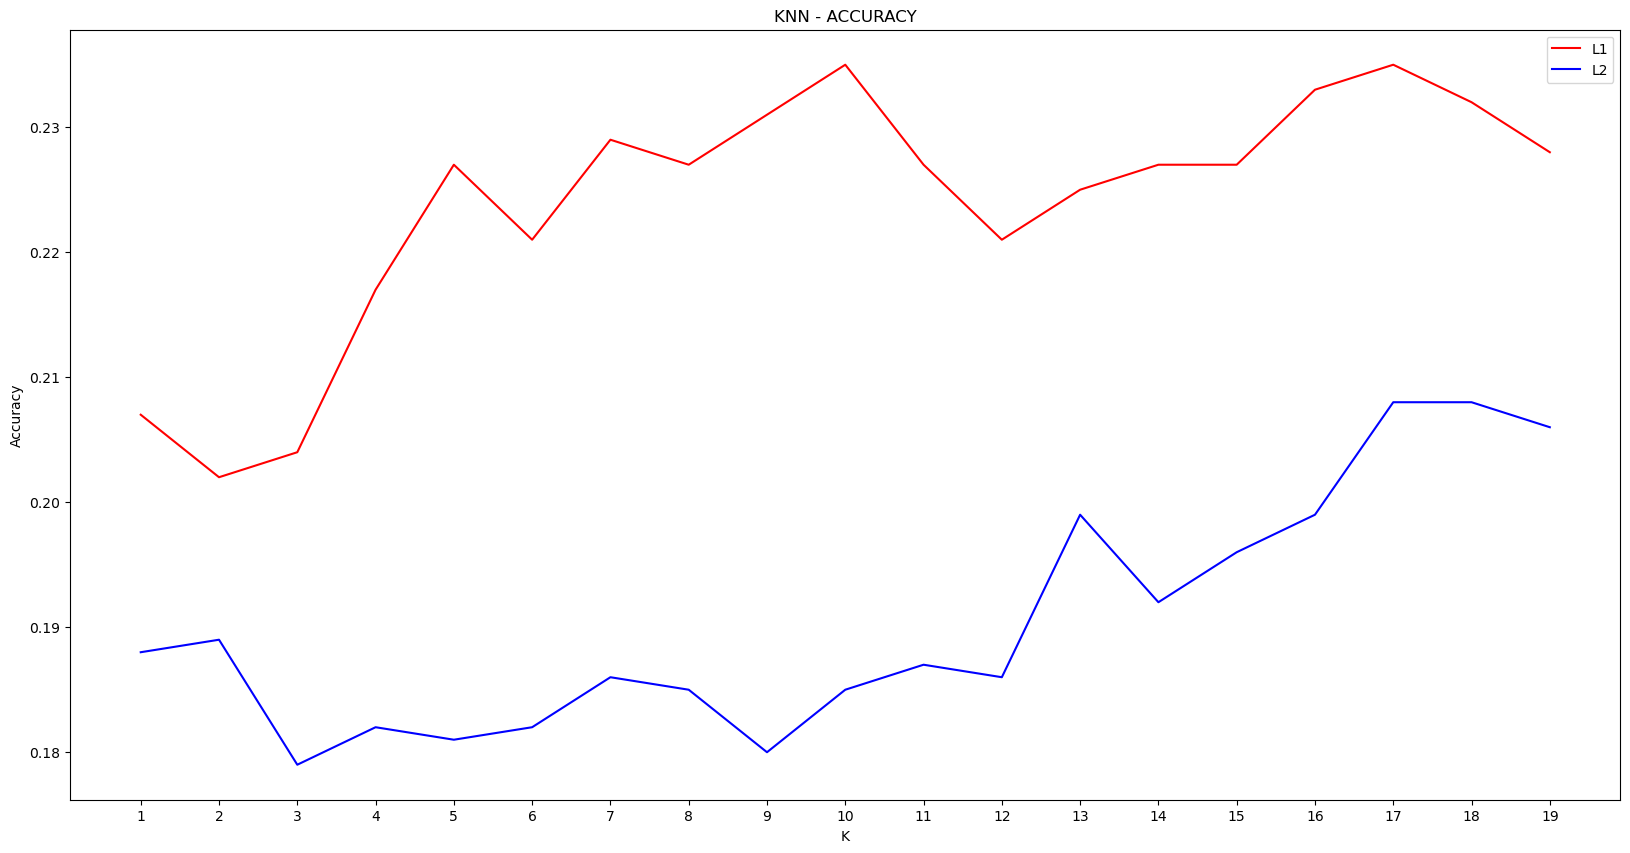

In [11]:
plt.figure(figsize=(20,10))
plt.title("KNN - ACCURACY")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(k_neighbors, list(l1_acc.values()), label="L1", color="red")
plt.plot(k_neighbors, list(l2_acc.values()), label="L2", color="blue")
plt.xticks(k_neighbors)
plt.legend(["L1", "L2"])
plt.show()